<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/indigo_aryl_alkyl/indigo_aryl_alkyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [2]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [3]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7205d2bc3fa3898c1b1f23b622dc2ae395a473fa1d739ba9dd935dc19e4b1f2e
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 540 (delta 113), reused 100 (delta 39), pack-reused 321 (from 1)
Receiving objects: 100% (540/540), 35.50 MiB | 23.50 MiB/s, done.
Resolving deltas: 100% (321/321), done.
Updating files: 100% (96/96), done.


In [4]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

In [5]:
data_dir = "/content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

In [6]:
# ✅ Ar = Ar1
import pandas as pd

modified_xlsx_path = "/content/DFTDescriptorPipeline/examples/azoarene/indigo_aryl_alkyl_with_Ar.xlsx"

df = pd.read_excel(xlsx_path)

df["Ar"] = df["Ar1"]

df.to_excel(modified_xlsx_path, index=False)

print("✔ new xlsx_path =", modified_xlsx_path)

✔ new xlsx_path = /content/DFTDescriptorPipeline/examples/azoarene/indigo_aryl_alkyl_with_Ar.xlsx



[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/azoarene/indigo_aryl_alkyl_with_Ar.xlsx

==== [1/21] [CYH-191-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-191-A.log ====
  polarizability: 81.54733333333333
  HOMO: -0.33555, LUMO: -0.0459
  dipole: 1.7848
  nbo_section: ok
Found C1: 7, C2: 1, A: 9, B: 14, D: 8, F: 2, G: 6
  atom index: c=7, e=1, a=9, b=14, d=8, f=2, g=6
  NBO values: 1.99461, -1.06189, 1.97806, -0.76748
  NBO charges: C1=0.80159, C2=-0.14071, O1=-0.58778, O2=-0.69597
  frequencies: I_C_O=343.9081, v_C_O=1859.5682
  C1, C2, L_C1_C2: (1.693899, 0.123074, -0.000214), (0.205588, 0.030277, -9.5e-05), 1.4912011702285508

==== [2/21] [CYH-196-A] Processing log: /content/DFTDescriptorPipeline/examples/indigo_aryl_alkyl/logfiles/CYH-196-A.log ====
  polarizability: 121.68633333333332
  HOMO: -0.33184, LUMO: -0.05216
  dipole: 0.7825
  nbo_section: ok
Found C1: 11, C2: 1, A: 13, B: 21, D: 12, F: 2, G: 6
  atom index: c=11,

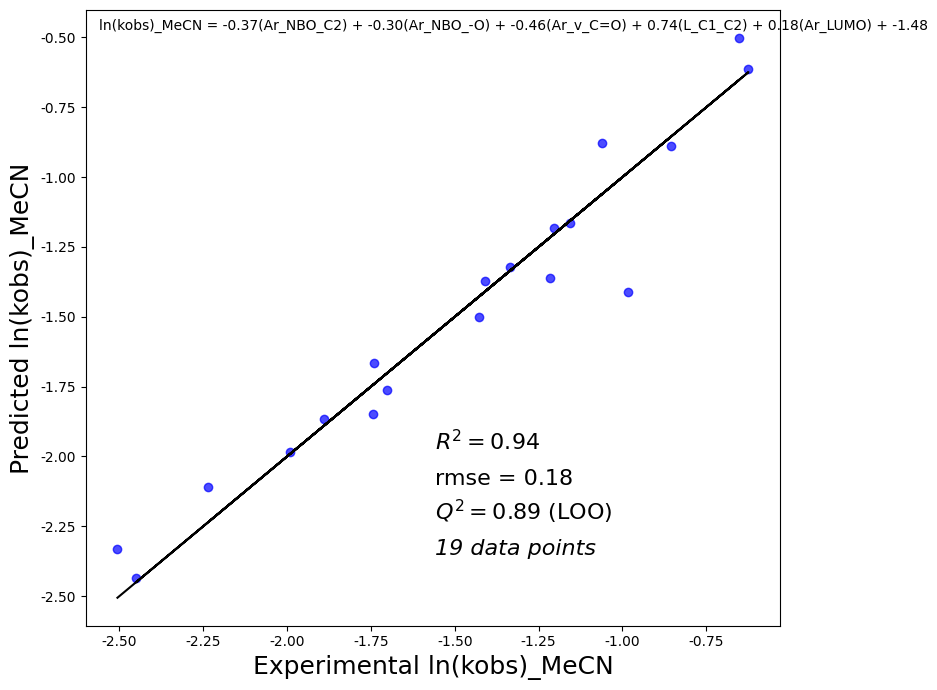


[STEP4] Analysis complete!


In [7]:
# One click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=modified_xlsx_path,
    target='ln(kobs)_MeCN'
)